# Imports

In [1]:
#     OS interaction
import os

#    Type hinting
import typing

#    Data Manipulation
import pandas as pd
#    pandas settings
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

#    Linear Algebra
import numpy as np

#    Data Visualization
import matplotlib.pyplot as plt    
import seaborn as sns

#    Regular Expressions
import re

# Load Data

In [2]:
project_dir = os.path.abspath('..')
data_path = '/data/detroit_911_calls.csv'

csv_path = project_dir + data_path


df = pd.read_csv(csv_path)

/home/devel/res/miniconda3/envs/p911-dev/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (14,15,16,17,18,19) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


# Explore

In [3]:
df.head()

,X,Y,incident_id,agency,incident_address,zip_code,priority,callcode,calldescription,category,call_timestamp,precinct_sca,respondingunit,officerinitiated,intaketime,dispatchtime,traveltime,totalresponsetime,time_on_scene,totaltime,neighborhood,block_id,council_district,longitude,latitude,oid
0,-82.986962,42.408358,201626400002,DPD,Promenade Ave & Roseberry St,48213,3,825030,DISTURBANCE,DISTURB,2016-09-20T09:36:12.000Z,910A,NaN,No,2.2,528.6,15.5,546.6,120.5,667.1,Wade,2.616350e+14,4.0,-82.986962,42.408358,260872651
1,-83.185213,42.430914,201626400019,DPD,Ardmore St & W 7 Mile Rd,48235,2,811020,AUTO X UNK INJ / IMPAIRED,ACCUNK,2016-09-20T09:46:32.000Z,1201,NaN,No,2.7,5.2,6.4,14.5,59.1,73.6,Tri-Point,2.616354e+14,2.0,-83.185213,42.430914,260872652
2,-83.146057,42.438770,201626400020,DPD,Pembroke Ave & Prairie St,48221,3,374030,RECOVER AUTO,RECAUTO,2016-09-20T09:48:24.000Z,123B,NaN,No,4.9,NaN,NaN,NaN,NaN,NaN,Oak Grove,2.616354e+14,2.0,-83.146057,42.438770,260872653
3,-83.191603,42.358257,201626400024,DPD,Joy Rd & Robson St,48228,3,825030,DISTURBANCE,DISTURB,2016-09-20T09:50:29.000Z,0207,NaN,No,1.4,3.4,7.6,15.0,41.7,56.7,We Care Community,2.616354e+14,7.0,-83.191603,42.358257,260872654
4,-83.175124,42.360867,201626400029,DPD,Littlefield St & Ellis St,48228,3,374030,RECOVER AUTO,RECAUTO,2016-09-20T09:54:37.000Z,28A,NaN,No,3,"1,645.3",NaN,NaN,NaN,"1,668.4",Barton-McFarland,2.616354e+14,7.0,-83.175124,42.360867,260872655


In [4]:
df.tail()

,X,Y,incident_id,agency,incident_address,zip_code,priority,callcode,calldescription,category,call_timestamp,precinct_sca,respondingunit,officerinitiated,intaketime,dispatchtime,traveltime,totalresponsetime,time_on_scene,totaltime,neighborhood,block_id,council_district,longitude,latitude,oid
2727151,-83.064139,42.351578,202005303484,DPD,Cass Ave & W Canfield St,48201,3,814035,PARKING COMPLAINT,PARK,2020-02-23T00:54:00.000Z,39B,NaN,No,0.6,NaN,NaN,NaN,NaN,3.7,Midtown,2.616352e+14,6.0,-83.064139,42.351578,263599802
2727152,-83.233535,42.357615,202005303485,DPD,Joy Rd & Auburn St,48228,2,TS,TRAFFIC STOP,TRF STOP,2020-02-23T00:54:08.000Z,610A,,Yes,0,0,0,0,6.3,6.3,Warrendale,2.616355e+14,7.0,-83.233535,42.357615,263599803
2727153,-84.132207,42.082976,202005303493,DPD,NaN,,3,875030,HANGUP CALLS,HNGUP,2020-02-23T00:57:02.000Z,,NaN,No,1.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-84.132207,42.082976,263599804
2727154,-83.045510,42.339273,202005303494,DPD,Beaubien St & E Adams Ave,48226,3,875030,HANGUP CALLS,HNGUP,2020-02-23T00:57:20.000Z,0312,NaN,No,0.8,NaN,NaN,NaN,NaN,NaN,Downtown,2.616352e+14,5.0,-83.045510,42.339273,263599805
2727155,-83.066505,42.339483,202005303500,DPD,S M 10 Service Drive & Grand River Ave,48201,3,935030,REMARKS,REMARKS,2020-02-23T00:59:11.000Z,0310,,Yes,0,0,0,0,0.1,0.1,Midtown,2.616352e+14,6.0,-83.066505,42.339483,263599806


In [5]:
df.describe()

,X,Y,incident_id,block_id,council_district,longitude,latitude,oid
count,2.727156e+06,2.727156e+06,2.727156e+06,2.627724e+06,2.592620e+06,2.727156e+06,2.727156e+06,2.727156e+06
mean,-8.310412e+01,4.238028e+01,2.018344e+11,2.616335e+14,4.277105e+00,-8.310412e+01,4.238028e+01,2.622362e+08
std,1.040925e-01,4.317160e-02,9.690016e+07,3.242399e+10,1.959116e+00,1.040925e-01,4.317160e-02,7.872623e+05
min,-8.413221e+01,4.208159e+01,2.016264e+11,2.609923e+14,1.000000e+00,-8.413221e+01,4.208159e+01,2.608727e+08
25%,-8.317814e+01,4.235210e+01,2.017323e+11,2.616351e+14,3.000000e+00,-8.317814e+01,4.235210e+01,2.615544e+08
50%,-8.309733e+01,4.237975e+01,2.018279e+11,2.616352e+14,5.000000e+00,-8.309733e+01,4.237975e+01,2.622362e+08
75%,-8.303696e+01,4.241669e+01,2.019179e+11,2.616354e+14,6.000000e+00,-8.303696e+01,4.241669e+01,2.629180e+08
max,-8.271078e+01,4.268528e+01,2.020053e+11,2.616399e+14,7.000000e+00,-8.271078e+01,4.268528e+01,2.635998e+08


In [6]:
df.shape

(2727156, 26)

One thing that immediately stands out is it seems that we may have two sets of columns representing the latitude and longitude (['X', 'Y'] and ['longitude', 'latitude']). So this will be the first area that we investigate.

The first course of action is to check whether or not the columns are duplicates of eachother.

In [7]:
geo_df = df[['X', 'Y', 'longitude', 'latitude']]
geo_df.head()

,X,Y,longitude,latitude
0,-82.986962,42.408358,-82.986962,42.408358
1,-83.185213,42.430914,-83.185213,42.430914
2,-83.146057,42.438770,-83.146057,42.438770
3,-83.191603,42.358257,-83.191603,42.358257
4,-83.175124,42.360867,-83.175124,42.360867


In [8]:
geo_df.loc[geo_df['X'] == geo_df['longitude']]

,X,Y,longitude,latitude


### So they are not exact duplicates which is surprising looking at the first five observations above so what exactly is the difference between them? 

We don't necessarily need to calculate the difference on the entire data set. Instead we will sample the dataset using 26795 observations, enough to ensure a 99% confidence level with 1% margin of error. Then from this sample we will calculate the difference between the corresponding columns and report the mean. This should give us a good idea about the magnitude of the difference. An accuracy of 10 meters will be more than sufficient for this project so if the mean difference is less than .0001 we can feel comfortable in moving forward with one set or the other.

In [9]:
geo_sample = geo_df.sample(26795, random_state=42)
assert geo_sample.shape[0] == 26795
geo_sample.head()

,X,Y,longitude,latitude
317558,-82.961930,42.384631,-82.961930,42.384631
2536996,-83.179763,42.440544,-83.179763,42.440544
2703217,-83.163774,42.420489,-83.163774,42.420489
1832194,-83.124346,42.367634,-83.124346,42.367634
2133105,-83.064296,42.360901,-83.064296,42.360901


In [10]:
X_diff = np.mean(abs
                 (df['X'] 
                - df['longitude']))

Y_diff = np.mean(abs
                 (df['Y'] 
                - df['latitude']))

(X_diff,
 Y_diff)

(2.411857485439831e-10, 2.477090706626804e-10)

In [11]:
# microns it is, lets go ahead and drop latitude and longitude in favor of X and Y

df = df.drop(columns=['latitude', 'longitude'])
df.head()

,X,Y,incident_id,agency,incident_address,zip_code,priority,callcode,calldescription,category,call_timestamp,precinct_sca,respondingunit,officerinitiated,intaketime,dispatchtime,traveltime,totalresponsetime,time_on_scene,totaltime,neighborhood,block_id,council_district,oid
0,-82.986962,42.408358,201626400002,DPD,Promenade Ave & Roseberry St,48213,3,825030,DISTURBANCE,DISTURB,2016-09-20T09:36:12.000Z,910A,NaN,No,2.2,528.6,15.5,546.6,120.5,667.1,Wade,2.616350e+14,4.0,260872651
1,-83.185213,42.430914,201626400019,DPD,Ardmore St & W 7 Mile Rd,48235,2,811020,AUTO X UNK INJ / IMPAIRED,ACCUNK,2016-09-20T09:46:32.000Z,1201,NaN,No,2.7,5.2,6.4,14.5,59.1,73.6,Tri-Point,2.616354e+14,2.0,260872652
2,-83.146057,42.438770,201626400020,DPD,Pembroke Ave & Prairie St,48221,3,374030,RECOVER AUTO,RECAUTO,2016-09-20T09:48:24.000Z,123B,NaN,No,4.9,NaN,NaN,NaN,NaN,NaN,Oak Grove,2.616354e+14,2.0,260872653
3,-83.191603,42.358257,201626400024,DPD,Joy Rd & Robson St,48228,3,825030,DISTURBANCE,DISTURB,2016-09-20T09:50:29.000Z,0207,NaN,No,1.4,3.4,7.6,15.0,41.7,56.7,We Care Community,2.616354e+14,7.0,260872654
4,-83.175124,42.360867,201626400029,DPD,Littlefield St & Ellis St,48228,3,374030,RECOVER AUTO,RECAUTO,2016-09-20T09:54:37.000Z,28A,NaN,No,3,"1,645.3",NaN,NaN,NaN,"1,668.4",Barton-McFarland,2.616354e+14,7.0,260872655


#### Next order of business is to address the mixed data types warning we received while loading in our data

In [12]:
mixed_types = df.iloc[:,range(14,20)]
mixed_types

,intaketime,dispatchtime,traveltime,totalresponsetime,time_on_scene,totaltime
0,2.2,528.6,15.5,546.6,120.5,667.1
1,2.7,5.2,6.4,14.5,59.1,73.6
2,4.9,NaN,NaN,NaN,NaN,NaN
3,1.4,3.4,7.6,15.0,41.7,56.7
4,3,"1,645.3",NaN,NaN,NaN,"1,668.4"
...,...,...,...,...,...,...
2727151,0.6,NaN,NaN,NaN,NaN,3.7
2727152,0,0,0,0,6.3,6.3
2727153,1.1,NaN,NaN,NaN,NaN,NaN
2727154,0.8,NaN,NaN,NaN,NaN,NaN


```
mixed_types['intaketime'].astype(float)

---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
<ipython-input-13-bab3625ef491> in <module>
----> 1 mixed_types['intaketime'].astype(float)

~/res/miniconda3/envs/p911-dev/lib/python3.8/site-packages/pandas/core/generic.py in astype(self, dtype, copy, errors)
   5696         else:
   5697             # else, only a single dtype is given
-> 5698             new_data = self._data.astype(dtype=dtype, copy=copy, errors=errors)
   5699             return self._constructor(new_data).__finalize__(self)
   5700 

~/res/miniconda3/envs/p911-dev/lib/python3.8/site-packages/pandas/core/internals/managers.py in astype(self, dtype, copy, errors)
    580 
    581     def astype(self, dtype, copy: bool = False, errors: str = "raise"):
--> 582         return self.apply("astype", dtype=dtype, copy=copy, errors=errors)
    583 
    584     def convert(self, **kwargs):

~/res/miniconda3/envs/p911-dev/lib/python3.8/site-packages/pandas/core/internals/managers.py in apply(self, f, filter, **kwargs)
    440                 applied = b.apply(f, **kwargs)
    441             else:
--> 442                 applied = getattr(b, f)(**kwargs)
    443             result_blocks = _extend_blocks(applied, result_blocks)
    444 

~/res/miniconda3/envs/p911-dev/lib/python3.8/site-packages/pandas/core/internals/blocks.py in astype(self, dtype, copy, errors)
    623             vals1d = values.ravel()
    624             try:
--> 625                 values = astype_nansafe(vals1d, dtype, copy=True)
    626             except (ValueError, TypeError):
    627                 # e.g. astype_nansafe can fail on object-dtype of strings

~/res/miniconda3/envs/p911-dev/lib/python3.8/site-packages/pandas/core/dtypes/cast.py in astype_nansafe(arr, dtype, copy, skipna)
    895     if copy or is_object_dtype(arr) or is_object_dtype(dtype):
    896         # Explicit copy, or required since NumPy can't view from / to object.
--> 897         return arr.astype(dtype, copy=True)
    898 
    899     return arr.view(dtype)

ValueError: could not convert string to float: '4,092.9'
```

We can see here that some of the observations use commas in their formatting so I think the best way for us to take care of this issue would be to define a function to iterate over the columns with mixed types return only numbers and the decimal and then convert the column to numeric type.

In [15]:
def fix_mixed_types(df: pd.DataFrame, cols: list)-> pd.DataFrame:
    """
    Fixes columns with mixed types using regular expressions and pd.to_numeric
    """
    df = df.copy()
    
    for col in cols:
        #    cast column to string type then use regular expressions to remove commas
        df[col] = df[col].astype(str).apply(lambda x: re.sub(r'[^0-9^.]', '', x))
        
        #    cast the reformatted column to float
        df[col] = pd.to_numeric(df[col])
    return df

In [16]:
#    Always good practice to test functions out before applying them to the entire dataset

mixed_types = fix_mixed_types(mixed_types, list(mixed_types.columns))

mixed_types

,intaketime,dispatchtime,traveltime,totalresponsetime,time_on_scene,totaltime
0,2.2,528.6,15.5,546.6,120.5,667.1
1,2.7,5.2,6.4,14.5,59.1,73.6
2,4.9,NaN,NaN,NaN,NaN,NaN
3,1.4,3.4,7.6,15.0,41.7,56.7
4,3.0,1645.3,NaN,NaN,NaN,1668.4
...,...,...,...,...,...,...
2727151,0.6,NaN,NaN,NaN,NaN,3.7
2727152,0.0,0.0,0.0,0.0,6.3,6.3
2727153,1.1,NaN,NaN,NaN,NaN,NaN
2727154,0.8,NaN,NaN,NaN,NaN,NaN


In [17]:
mixed_types.dtypes

intaketime           float64
dispatchtime         float64
traveltime           float64
totalresponsetime    float64
time_on_scene        float64
totaltime            float64
dtype: object

In [18]:
df = fix_mixed_types(df, list(mixed_types.columns))

df.dtypes

X                    float64
Y                    float64
incident_id            int64
agency                object
incident_address      object
zip_code              object
priority              object
callcode              object
calldescription       object
category              object
call_timestamp        object
precinct_sca          object
respondingunit        object
officerinitiated      object
intaketime           float64
dispatchtime         float64
traveltime           float64
totalresponsetime    float64
time_on_scene        float64
totaltime            float64
neighborhood          object
block_id             float64
council_district     float64
oid                    int64
dtype: object

In [19]:
#    lets also ensure that all our null values are encoded the same way

df = df.fillna(np.NaN)
df

,X,Y,incident_id,agency,incident_address,zip_code,priority,callcode,calldescription,category,call_timestamp,precinct_sca,respondingunit,officerinitiated,intaketime,dispatchtime,traveltime,totalresponsetime,time_on_scene,totaltime,neighborhood,block_id,council_district,oid
0,-82.986962,42.408358,201626400002,DPD,Promenade Ave & Roseberry St,48213,3,825030,DISTURBANCE,DISTURB,2016-09-20T09:36:12.000Z,910A,NaN,No,2.2,528.6,15.5,546.6,120.5,667.1,Wade,2.616350e+14,4.0,260872651
1,-83.185213,42.430914,201626400019,DPD,Ardmore St & W 7 Mile Rd,48235,2,811020,AUTO X UNK INJ / IMPAIRED,ACCUNK,2016-09-20T09:46:32.000Z,1201,NaN,No,2.7,5.2,6.4,14.5,59.1,73.6,Tri-Point,2.616354e+14,2.0,260872652
2,-83.146057,42.438770,201626400020,DPD,Pembroke Ave & Prairie St,48221,3,374030,RECOVER AUTO,RECAUTO,2016-09-20T09:48:24.000Z,123B,NaN,No,4.9,NaN,NaN,NaN,NaN,NaN,Oak Grove,2.616354e+14,2.0,260872653
3,-83.191603,42.358257,201626400024,DPD,Joy Rd & Robson St,48228,3,825030,DISTURBANCE,DISTURB,2016-09-20T09:50:29.000Z,0207,NaN,No,1.4,3.4,7.6,15.0,41.7,56.7,We Care Community,2.616354e+14,7.0,260872654
4,-83.175124,42.360867,201626400029,DPD,Littlefield St & Ellis St,48228,3,374030,RECOVER AUTO,RECAUTO,2016-09-20T09:54:37.000Z,28A,NaN,No,3.0,1645.3,NaN,NaN,NaN,1668.4,Barton-McFarland,2.616354e+14,7.0,260872655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2727151,-83.064139,42.351578,202005303484,DPD,Cass Ave & W Canfield St,48201,3,814035,PARKING COMPLAINT,PARK,2020-02-23T00:54:00.000Z,39B,NaN,No,0.6,NaN,NaN,NaN,NaN,3.7,Midtown,2.616352e+14,6.0,263599802
2727152,-83.233535,42.357615,202005303485,DPD,Joy Rd & Auburn St,48228,2,TS,TRAFFIC STOP,TRF STOP,2020-02-23T00:54:08.000Z,610A,,Yes,0.0,0.0,0.0,0.0,6.3,6.3,Warrendale,2.616355e+14,7.0,263599803
2727153,-84.132207,42.082976,202005303493,DPD,NaN,,3,875030,HANGUP CALLS,HNGUP,2020-02-23T00:57:02.000Z,,NaN,No,1.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,263599804
2727154,-83.045510,42.339273,202005303494,DPD,Beaubien St & E Adams Ave,48226,3,875030,HANGUP CALLS,HNGUP,2020-02-23T00:57:20.000Z,0312,NaN,No,0.8,NaN,NaN,NaN,NaN,NaN,Downtown,2.616352e+14,5.0,263599805


## Pairplot of Data Sample

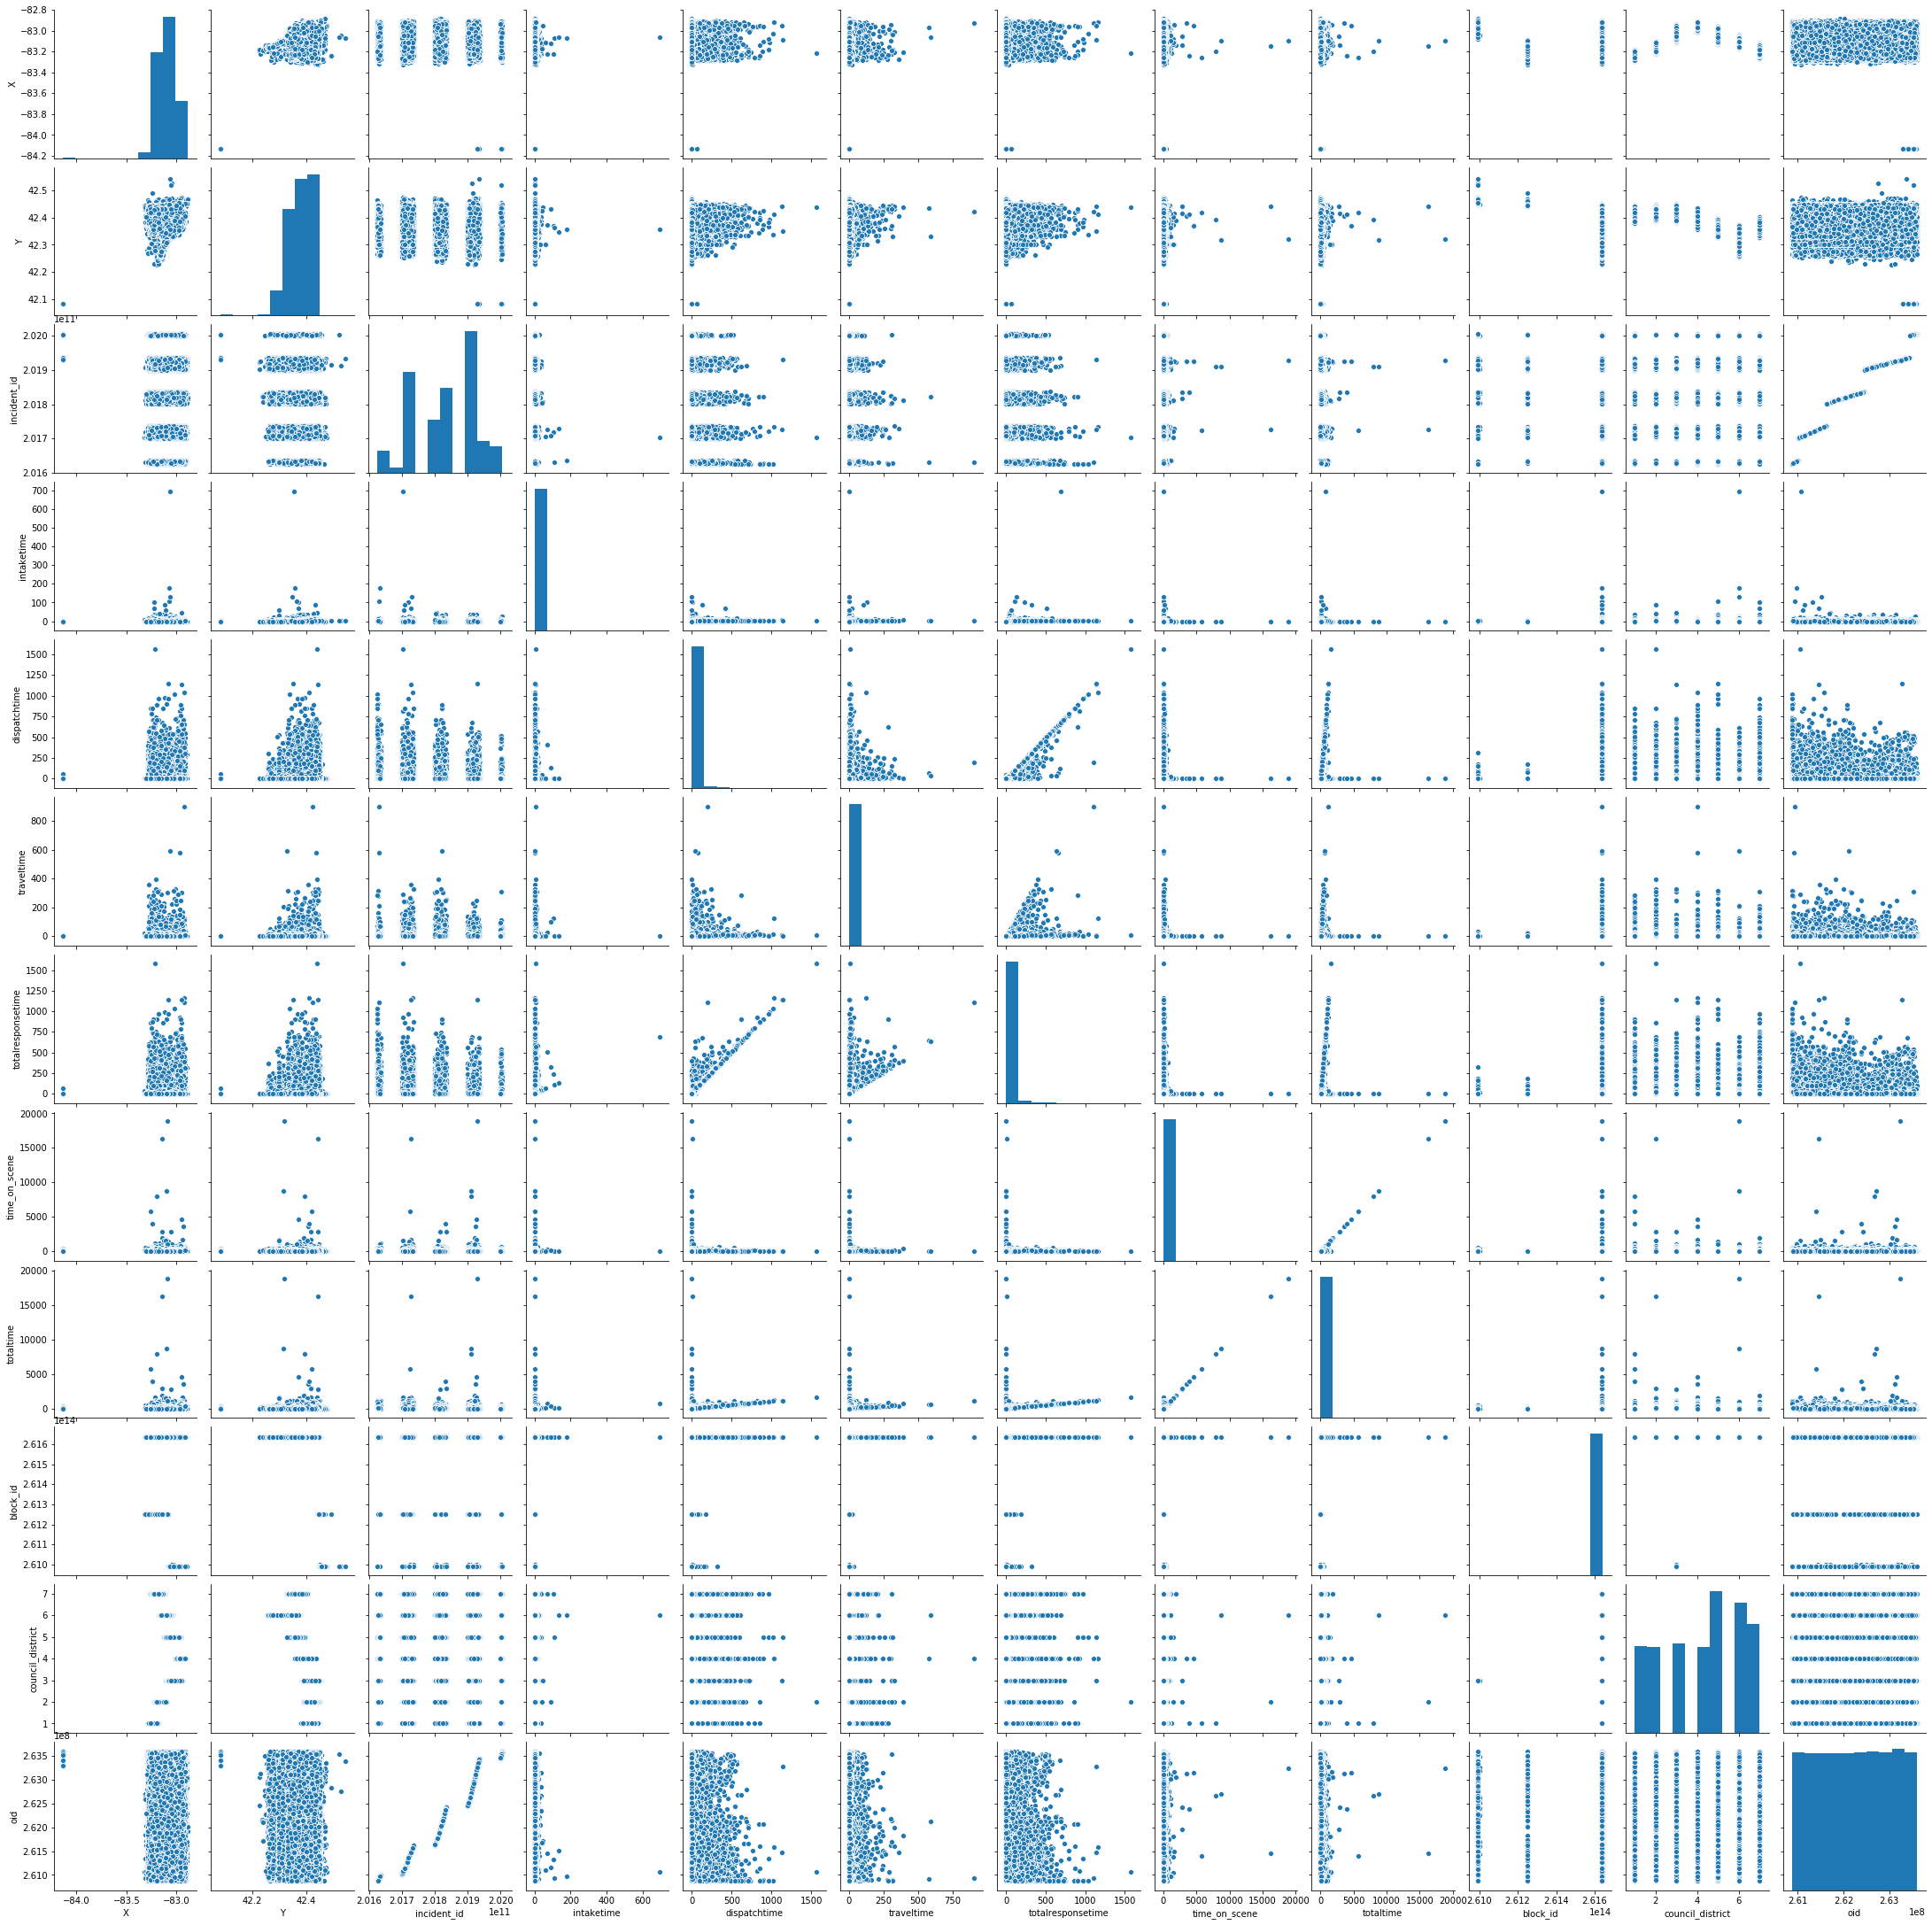

In [20]:
df_sample = df.sample(100000, random_state=42)

sns.pairplot(df_sample)

In [21]:
#    and finally lets just take a quick look at the cardinality of our categorical columns

df.select_dtypes(exclude='number').nunique().sort_values(ascending=False)

call_timestamp      2684929
respondingunit       264343
incident_address      20666
callcode                341
calldescription         263
precinct_sca            240
category                239
neighborhood            207
zip_code                 66
priority                  9
officerinitiated          2
agency                    2
dtype: int64

#### Let's save the cleaned-up notebook for use in our next notebook where we will do our wrangling and feature engineering

In [22]:
df.to_csv(project_dir+'/data/detroit_911_calls_cleaned.csv')